In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error

In [2]:
# Using raw string literal (r) to avoid escape sequence issues
df = pd.read_csv(r"D:\Kaggle\sample_submission.csv")

# OR use double backslashes
df = pd.read_csv("D:\\Kaggle\\sample_submission.csv")


import pandas as pd

# Replace the path with the actual location of your train.csv file
train = pd.read_csv(r"D:\\Kaggle\\sample_submission.csv")  # Update with the correct path to your train file

# Check if the train dataset is loaded correctly by viewing the first few rows
print(train.head())

        id  Premium Amount
0  1200000        1102.545
1  1200001        1102.545
2  1200002        1102.545
3  1200003        1102.545
4  1200004        1102.545


In [3]:
# For example, fill missing values with the median or mean (depending on the column)
train.fillna(train.median(), inplace=True)

# Alternatively, drop rows with missing values
train.dropna(inplace=True)

In [4]:
from sklearn.preprocessing import StandardScaler

# Applying StandardScaler to scale features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data (X for features, y for target)
X = train.drop('Premium Amount', axis=1)  # Features
y = train['Premium Amount']  # Target

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              800000 non-null  int64  
 1   Premium Amount  800000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 12.2 MB


In [7]:
def data_type_of_attribute(df):
    cat=[]
    num=[]
    for i in df.columns:
        if df[i].dtypes == 'object':
            cat.append(i)
        else:
            num.append(i)
    return cat,num

In [8]:
df_cat, df_num = data_type_of_attribute(df)


In [9]:
for i in df_cat:
    print(df[i].value_counts(),'\n')

In [10]:
pd.options.display.float_format = '{:.2f}'.format #to display values in float format
df.describe()

,id,Premium Amount
count,800000.00,800000.00
mean,1599999.50,1102.54
std,230940.25,0.00
min,1200000.00,1102.55
25%,1399999.75,1102.55
50%,1599999.50,1102.55
75%,1799999.25,1102.55
max,1999999.00,1102.55


In [11]:
import matplotlib.pyplot as plt


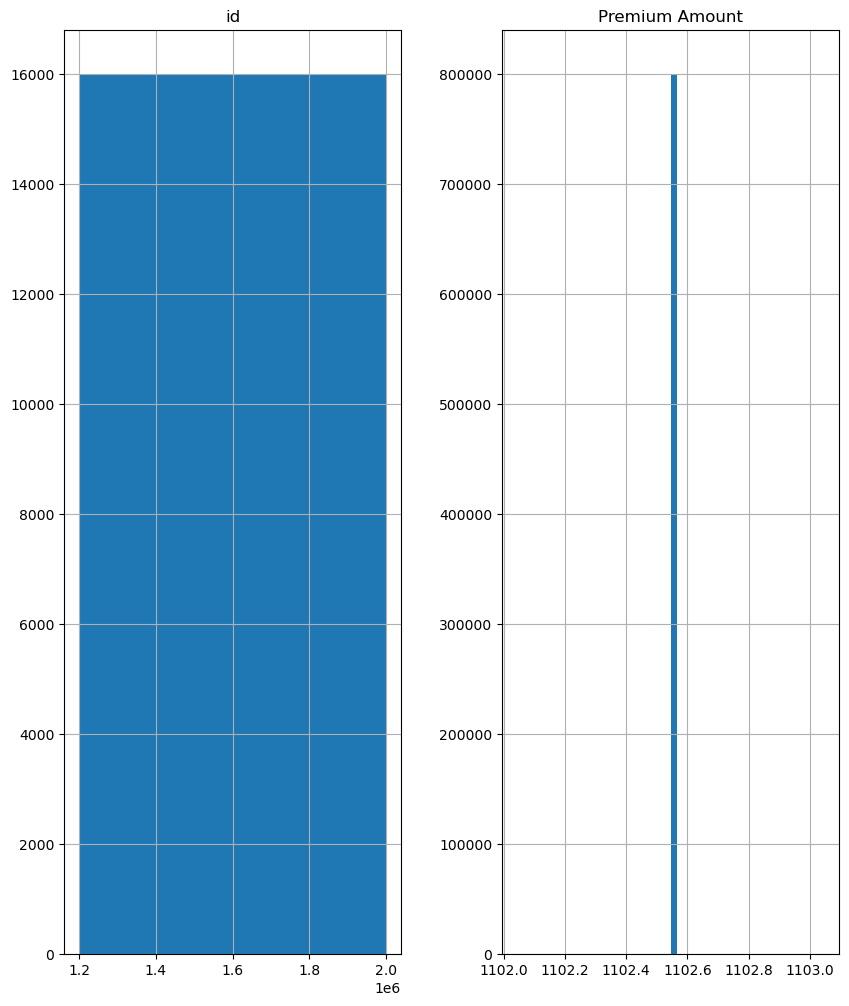

In [12]:
df.hist(bins=50, figsize=(10,12))
plt.show()

In [ ]:
#Summary of Numerical Atrributes of Data
The total data consist of 1200000 observation in each column(neglect null/NaN Values).
The 25% of observations in Premium Amount lies under 514.00 value.
And the 75% of observations in Premium Amount lies under 1509.00 value.
The point to be note from Premium Amount attribute is that their is a huge difference in75% Value and Maximum value 4999.00.
It shows that the data consist of outliers in its Target Attribute.